In [8]:
import visualize as vs
import numpy as np
from ltts import LTTS
from env import Reach

import random as rd

import matplotlib.pyplot as plt

# Here we define our model
N, I, O, T = 100, 2, 2, 100;

dt = 1 / T;
tau_m = 2. * dt;
tau_s = 2. * dt;
tau_ro = 5. * dt;
beta_s  = np.exp (-dt / tau_s);
beta_ro = np.exp (-dt / tau_ro);
sigma_teach = 5.;
sigma_input = 5.;
offT = 1;
dv = 1 / 5.;
alpha = .1;
alpha_rout = .1;
Vo = -4;
h = -4;
s_inh = 20;

# Here we build the dictionary of the simulation parameters
par = {'tau_m' : tau_m, 'tau_s' : tau_s, 'tau_ro' : tau_ro, 'beta_ro' : beta_ro,
	   'dv' : dv, 'alpha' : alpha, 'Vo' : Vo, 'h' : h, 's_inh' : s_inh,
	   'N' : N, 'T' : T, 'dt' : dt, 'offT' : offT, 'alpha_rout' : alpha_rout,
	   'sigma_input' : sigma_input, 'sigma_teach' : sigma_teach};

# Here we init our model
ltts = LTTS ((N, I, O, T), par);


In [9]:

for k in range(1):

    # Here we define target and initial position
	targ = np.array ((0.4, 0.3));
	init = np.array ((0.0, 0.0));

	# Based on this information we compute the expert trajectory input-output and
	# produce a network behaviour to clone

	steps = 80;
	dx, dy = (targ - init) / steps;

	inp = targ - (init + np.array ([((i + 1) * dx, (i + 1) * dy) for i in range (steps)]))
	out = np.array ([[dx, dy] * steps]).reshape (-1, 2)

	inp = np.pad (inp, ((0, T - inp.shape [0]), (0, 0))).T;
	out = np.pad (out, ((0, T - out.shape [0]), (0, 0))).T;

	out[:, :offT] = 0;
	out[:, steps:] = 0

	inp /= np.max ( np.abs(inp))
	out /= np.max ( np.abs(out))

	out += np.random.uniform (-0.05, 0.05, size = out.shape);
	Inp = ltts.Jin @ inp + ltts.Jteach @ out;
	Targ, _ = ltts.compute (Inp);

	# Here we clone this behaviour
	Inp = ltts.Jin @ inp;
	ltts.clone ((Targ, out), Inp);

	####

	targ = np.array ((-0.4, -0.3));
	init = np.array ((0.0, 0.0));

	# Here we init our model
	#ltts = LTTS ((N, I, O, T), par);

	# Based on this information we compute the expert trajectory input-output and
	# produce a network behaviour to clone

	steps = 80;
	dx, dy = (targ - init) / steps;

	inp = targ - (init + np.array ([((i + 1) * dx, (i + 1) * dy) for i in range (steps)]))
	out = np.array ([[dx, dy] * steps]).reshape (-1, 2)

	inp = np.pad (inp, ((0, T - inp.shape [0]), (0, 0))).T;
	out = np.pad (out, ((0, T - out.shape [0]), (0, 0))).T;

	out[:, :offT] = 0;
	out[:, steps:] = 0

	inp /= np.max ( np.abs(inp))
	out /= np.max ( np.abs(out))

	out += np.random.uniform (-0.05, 0.05, size = out.shape);
	Inp = ltts.Jin @ inp + ltts.Jteach @ out;
	Targ, _ = ltts.compute (Inp);

	# Here we clone this behaviour
	Inp = ltts.Jin @ inp;
	ltts.clone ((Targ, out), Inp);


AttributeError: module 'utils' has no attribute 'style_ax'

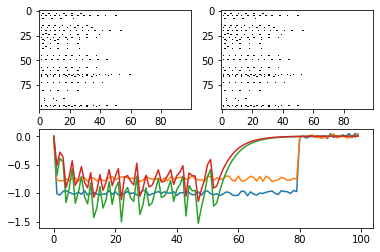

In [10]:
S_gen, action = ltts.compute (Inp);
vs.cloning_plot ((Targ, out), (S_gen, action), save = 'test-raster.eps');


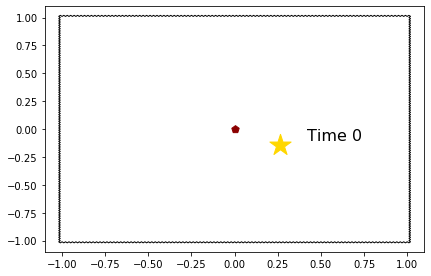

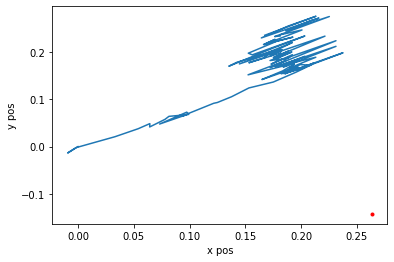

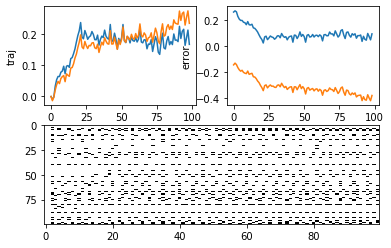

In [28]:
# Here we init the environment

#targ = np.array ((0.1, 0.));
targ = np.array ( ( rd.random()-.5 , rd.random()-.5 ));


env = Reach (max_T = T, targ = targ, init = init);

ltts.t=0;
ltts.S = ltts.S*0;
ltts.S_hat = ltts.S_hat*0;

traj = np.zeros((2, T-1))
dpos = np.zeros((2, T-1))

obv = init

for t in range (T - 1):
	action = ltts.step (obv * steps/10);
	obv, r, done, agent = env.step (action / steps);

	#fig = env.render ();
	traj[:,t] = agent
	dpos[:,t] = obv
	#fig.savefig ('test.eps');


plt.figure()
plt.plot(traj[0,:],traj[1,:])
plt.plot(targ[0],targ[1],'r.')
plt.xlabel('x pos')
plt.ylabel('y pos')

fig = plt.figure()

plt.subplot(221)
plt.plot(traj[0,:])
plt.plot(traj[1,:])
plt.ylabel('traj')
plt.xlabel('time')

plt.subplot(222)

plt.plot(dpos[0,:])
plt.plot(dpos[1,:])
plt.xlabel('time')
plt.ylabel('error')

plt.subplot(212)
plt.imshow(ltts.S, aspect = 'auto', cmap = 'binary');



plt.show(fig)



In [21]:
steps

80